# Video games market analysis #

## Briefing ##

### Project description ###

You work in the Strimchik online store, which sells computer games all over the world. Historical game sales data, user and expert ratings, genres and platforms (such as Xbox or PlayStation) are available from public sources. 

**You need to identify the patterns that determine the success of the game. This will allow you to bid on a potentially popular product and plan advertising campaigns.**

Here is the data up to 2016. Let's say it's December 2016 and you're planning a campaign for 2017. It is necessary to work out the principle of working with data. It doesn't matter if you're forecasting 2017 sales from 2016 data or 2027 sales from 2026 data.

The abbreviation ESRB (Entertainment Software Rating Board) comes across in the data set - this is an association that determines the age rating of computer games. The ESRB evaluates game content and assigns it to an appropriate age rating.

### Data description ###

- Name - the name of the game
- Platform - the name of the platform
- Year_of_Release - the year of game release
- Genre - the genre of the game
- NA_sales - sales in North America (millions of copies sold)
- EU_sales - sales in Europe (millions of copies sold)
- JP_sales - sales in Japan (millions of copies sold)
- Other_sales - sales in other countries (millions of copies sold)
- Critic_Score - rating score assigned by critics (maximum 100)
- User_Score - rating score assigned by users (maximum 10)
- Rating - rating from the ESRB (Entertainment Software Rating Board). 

## Data file review ##

In [82]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
import warnings
warnings.filterwarnings("ignore")

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [85]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/games.csv')

In [86]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [88]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [89]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [90]:
data.duplicated().sum()

0

In [91]:
data.isna().mean()

Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

In [92]:
data['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

### Summary: ###

**Data types**

- Column names must be converted to lowercase
- Year_of_Release must be converted to integer values
- User_Score needs to be converted from object format to float format 

**Explicit duplicates**

- Not detected

**Missing data**

There are 16715 rows in the data, there are missings in the following columns:

- Name, 2 lines -> we can delete those since we can not fill in the name of the game, besides, deleting two lines will not lead to data distortion
- Year_of_Release, 269 lines -> theoretically it would be possible to conduct our own research and find out in what year this or that game was released, but in this case, it is easier to remove the observations, since they're only 1.6% of the total.
- Critic_Score, 51% -> we don't have enough information to replace gaps with anything, leave it as it is
- User_Score, 40% -> before changing the format, we will need to deal with "tbd". We will not fill in the gaps because we do not have enough information on how to do this for each game.
- Rating, 40% -> we will not fill in the gaps here either, for the same reason as the ratings of critics and users.


**Rating**

There are categories in the ESRB association rating, which are indicated by abbreviations in the data. List of categories:

- Everyone. Content is generally suitable for all ages.
- Everyone 10+ Content is generally suitable for ages 10 and up.
- Teen. Content is generally suitable for ages 13 and up.
- Mature 17+ Content is generally suitable for ages 17 and up.
- Adults Only 18+
- Rating pending.
- Rating Pending — Likely Mature 17+
- Kids to Adults (by now replaced by Everyone)
- EC (by now replaced by Everyone)

Next, we will prepare the data for further analysis.

## Data preparation ##

### Data types and missings ###

In [93]:
data.columns = data.columns.str.lower()

In [94]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [95]:
data.dropna(subset = ['name','year_of_release'], inplace = True)
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [96]:
data['year_of_release'] = np.ceil(data['year_of_release'])

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Let's replace tbd (to be determined) with NaN (it is clear that this means that the information will be determined and updated later, but for us this is not  relevant and is equal to the absence of information).

In [98]:
 data.loc[data['user_score'] == 'tbd'] = None
 data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', None, '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [99]:
data['user_score'] = data['user_score'].astype(float)

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             14068 non-null  object 
 1   platform         14068 non-null  object 
 2   year_of_release  14068 non-null  float64
 3   genre            14068 non-null  object 
 4   na_sales         14068 non-null  float64
 5   eu_sales         14068 non-null  float64
 6   jp_sales         14068 non-null  float64
 7   other_sales      14068 non-null  float64
 8   critic_score     6927 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           7442 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


### Total sales in all regions ###

Let's create a column with total sales for all regions

In [101]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Summary: ###

We adjusted missing values and data types, lowered cases for all columns names, and calculated total sales across all regions. We are now ready to start exploratory data analysis.

## Exploratory data analysis ##

### Number of games by year ###

Is data for all periods important?
- No, some significant game production starts in 1995

In [102]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


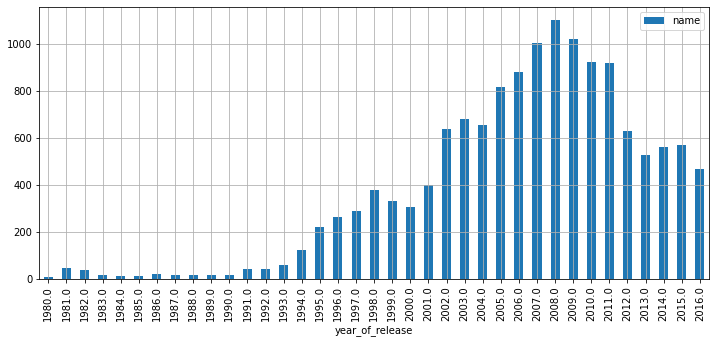

In [103]:
(data
    .pivot_table(index='year_of_release', values='name', aggfunc='count')
    .plot(kind='bar', grid=True, figsize=(12, 5))
)

### Change in sales by platform ###

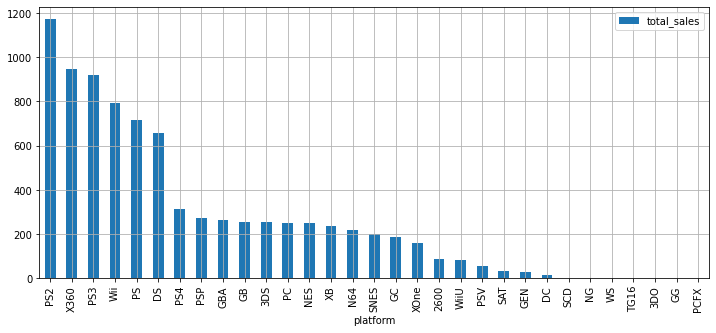

In [104]:
platform_list = (data
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
)

platform_list.plot(kind='bar', grid=True, figsize=(12, 5))
plt.show()

In [105]:
platform_list

,total_sales
platform,
PS2,1171.19
X360,948.74
PS3,921.09
Wii,791.91
PS,714.26
DS,655.36
PS4,314.00
PSP,273.11
GBA,263.70


Let's collect the list of platforms with sales of more than 600 and then explore their distribution by year on the charts

In [106]:
platform_list_top = platform_list.query('total_sales > 600')

platform_list_top

,total_sales
platform,
PS2,1171.19
X360,948.74
PS3,921.09
Wii,791.91
PS,714.26
DS,655.36


In [107]:
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'PS', 'DS']

Text(0, 0.5, 'Sales, milloins of copies')

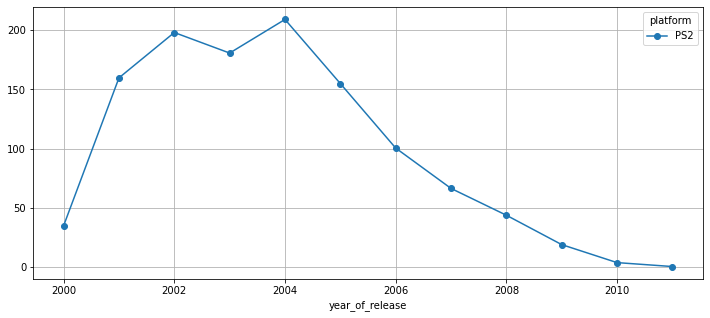

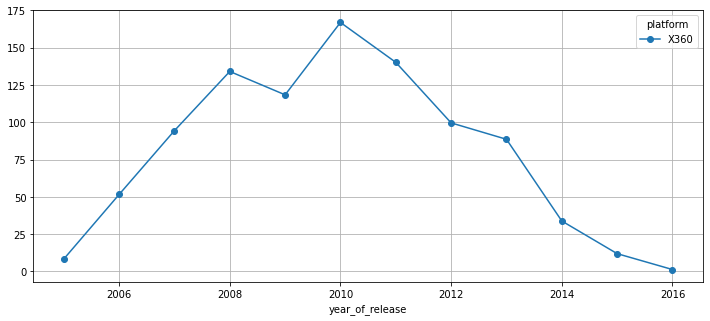

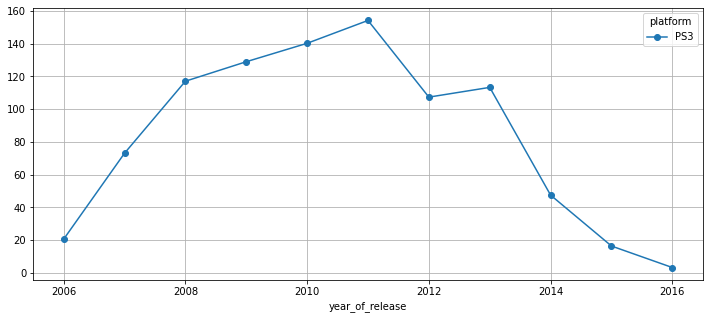

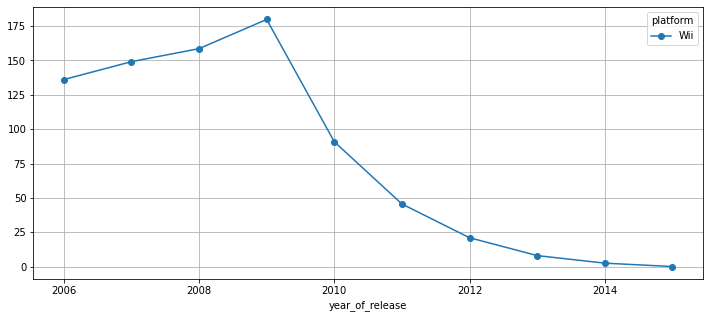

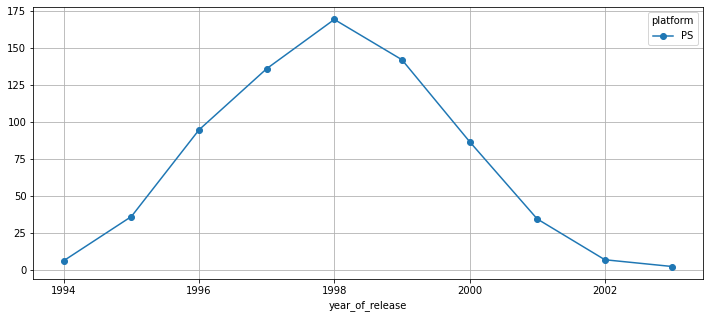

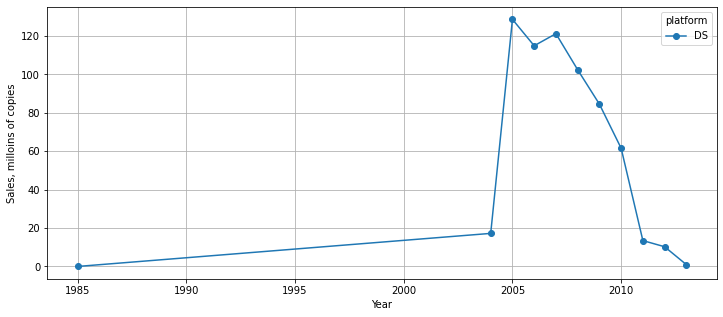

In [108]:
for platform in top_platforms:
    data.query('platform == @platform').pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(style='o-', grid=True, figsize=(12,5))
    
plt.xlabel('Year')
plt.ylabel('Sales, milloins of copies')

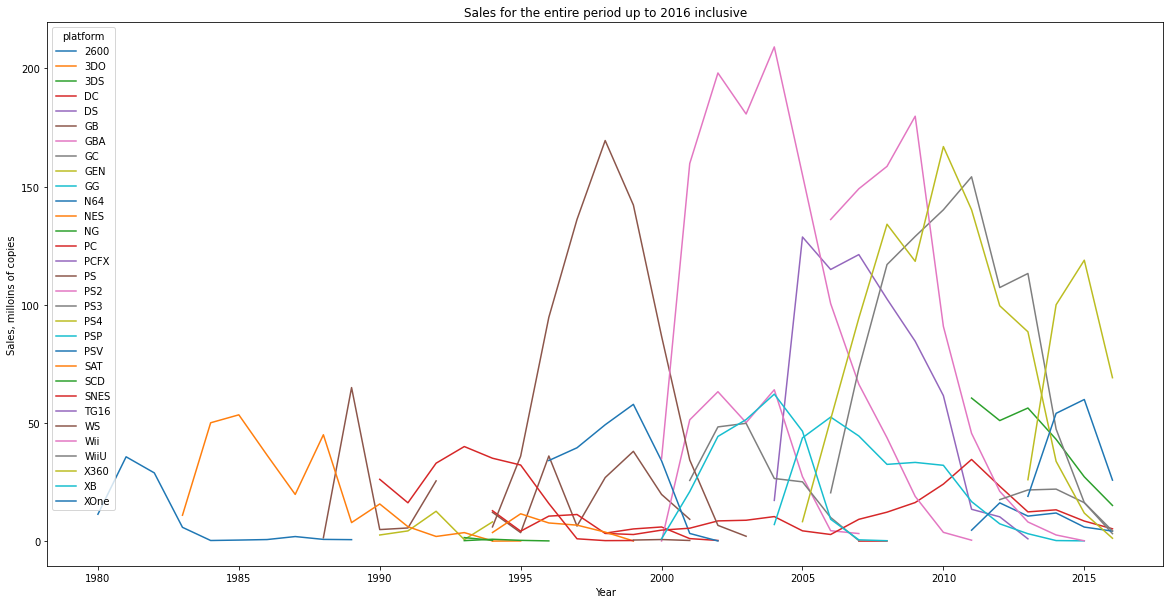

In [109]:
data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(figsize=(20,10))
plt.title('Sales for the entire period up to 2016 inclusive')
plt.xlabel('Year')
plt.ylabel('Sales, milloins of copies')
plt.show()

In [110]:
platfrom_years = data.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
platfrom_years.set_axis(['platform','years_min', 'years_max'], axis = 'columns', inplace=True)
platfrom_years['duration'] = platfrom_years['years_max'] - platfrom_years['years_min']
platfrom_years['duration'] = platfrom_years['duration'].astype('int')
platfrom_years = platfrom_years.sort_values(by='years_max', ascending=False).reset_index()

platfrom_years.head()

,index,platform,years_min,years_max,duration
0,30,XOne,2013.0,2016.0,3
1,2,3DS,2011.0,2016.0,5
2,28,X360,2005.0,2016.0,11
3,27,WiiU,2012.0,2016.0,4
4,20,PSV,2011.0,2016.0,5


In [111]:
platfrom_years['duration'].mean()

7.580645161290323

In [112]:
platfrom_years['duration'].median()

6.0

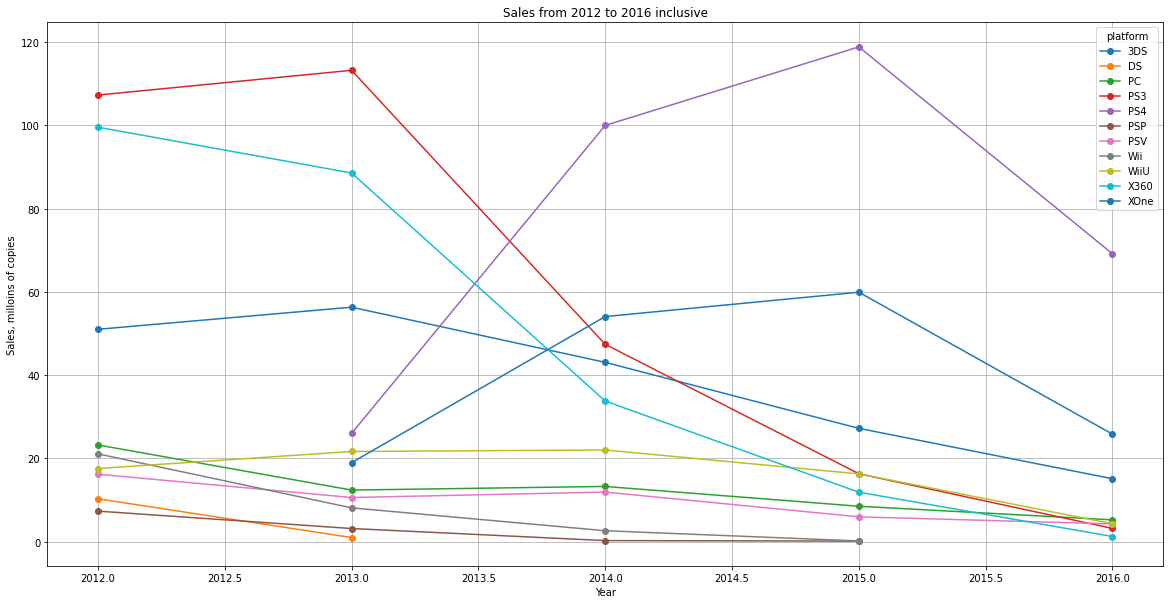

In [113]:
data.query('year_of_release >= 2012').pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(style='o-', grid=True, figsize=(20,10))
plt.title('Sales from 2012 to 2016 inclusive')
plt.xlabel('Year')
plt.ylabel('Sales, milloins of copies')
plt.show()

**Conclusions:**

We have studied the platforms and their lifecycle. It turns out that the platforms with the highest total sales (more than 600 million copies) are the platforms 'PS2', 'X360', 'PS3', 'Wii', 'PS', 'DS'. The average life span of a platform is 7.6 years (median is 6 years), the leading platforms have been on the market for about 10 years, while the peak of their popularity falls on half of the life cycle. At the same time, it is not seen that the platforms "reborn" and experienced several peaks in sales.

After examining the schedules for the emergence of new platforms, it turned out that most of them had already experienced the peak of sales by 2015 and now their sales are falling.

This data will help us determine the current period.

### Determination of current period data ###

Potentially, we are trying to identify platforms with peak sales in 2017. To do this, we must take into account that if, on average, the existence of the platform is 6-8 years, and the peak of sales is in half of its life, then in order for it to fall on 2017, the platform must be "born" 3-4 years "before", i.e. in 2013. Indeed, we saw that just by 2013, two new platforms appeared and several others completed or are ending their life cycle. Let us define the current period as the period for the last 5 years, i.e. since 2012 and after.

In [114]:
data_actual = data.query('year_of_release >= 2012')
data_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


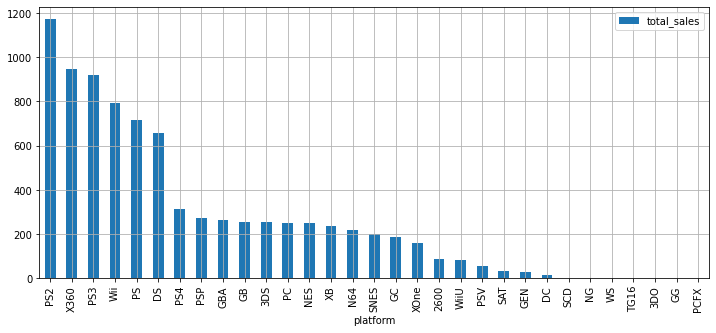

In [115]:
platform_list_2 = (data_actual
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
)

platform_list.plot(kind='bar', grid=True, figsize=(12, 5))
plt.show()

In [116]:
platform_list_2

,total_sales
platform,
PS4,314.00
PS3,287.39
X360,235.00
3DS,192.71
XOne,158.77
WiiU,81.79
PC,62.56
PSV,48.87
Wii,31.95


In [117]:
top_platforms_2 = ['PS4', 'PS3', 'X360', '3DS', 'XOne']

Text(0, 0.5, 'Продажи, млн.копий')

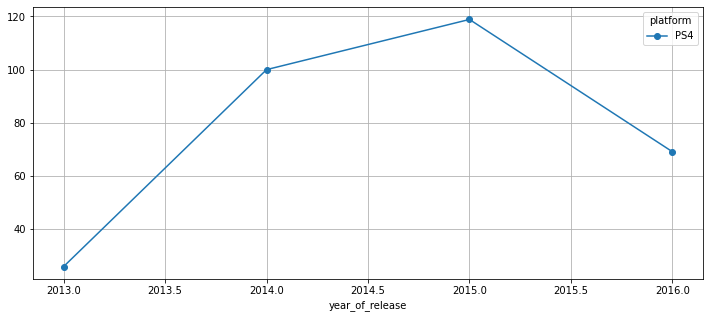

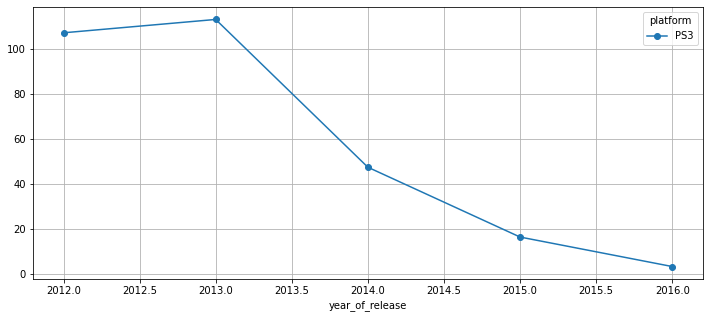

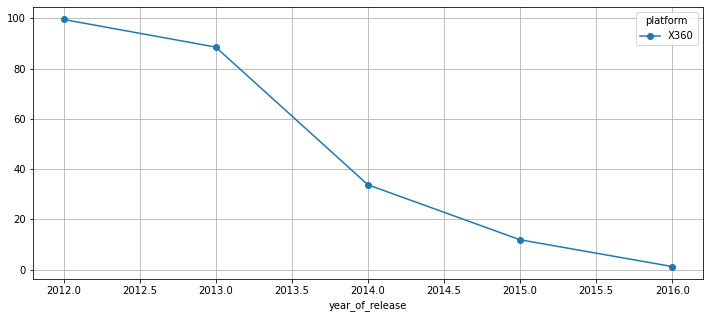

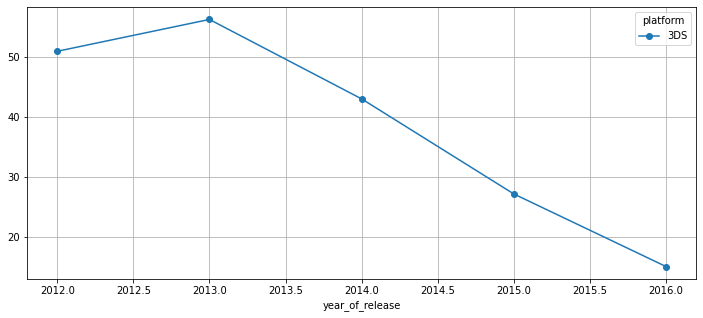

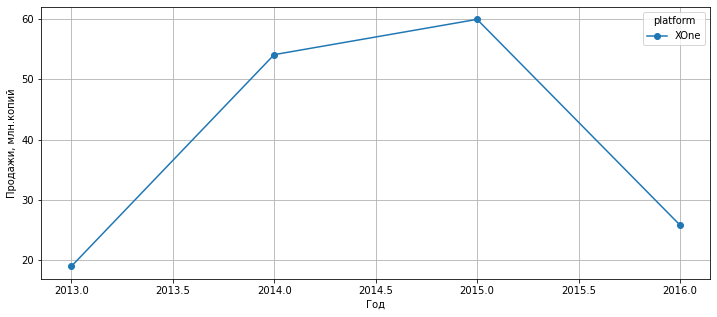

In [118]:
for platform in top_platforms_2:
    data_actual.query('platform == @platform').pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(style='o-', grid=True, figsize=(12,5))
    
plt.xlabel('Год')
plt.ylabel('Продажи, млн.копий')

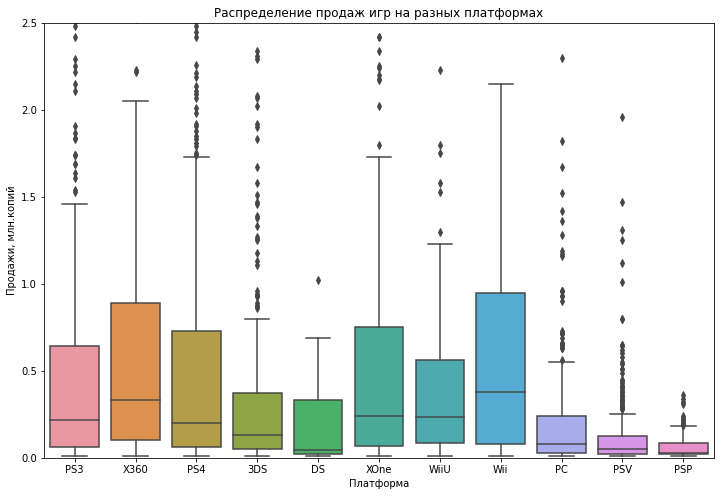

In [119]:
plt.figure(figsize=(12, 8))
(sns.boxplot(data = data_actual, y='total_sales', x='platform').set(title='Распределение продаж игр на разных платформах'))
plt.xlabel('Платформа')
plt.ylabel('Продажи, млн.копий')
plt.ylim(0, 2.5)
plt.show()

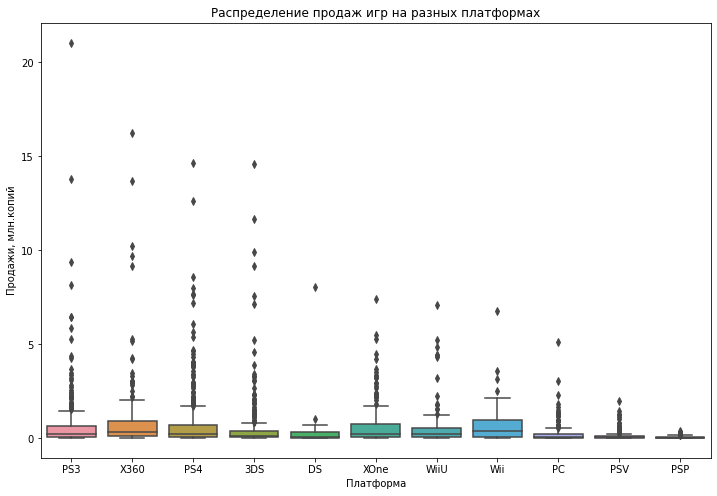

In [120]:
plt.figure(figsize=(12, 8))
(sns.boxplot(data = data_actual, y='total_sales', x='platform').set(title='Распределение продаж игр на разных платформах'))
plt.xlabel('Платформа')
plt.ylabel('Продажи, млн.копий')
plt.show()

**Conclusions:**

In the current period, 5 platforms are leading in terms of total sales: PS4, PS3, X360, 3DS, XOne. However, all of them have already experienced their peak sales and now sales are declining.

PS4 and XOne are worth highlighting as potentially profitable platforms: although their sales are declining like the sales of the rest, however, the level of sales is still higher and this gives reason to believe that in 2017 they will be still more profitable than others, even taking into account the general decline.

According to Box and Whisker Plot, the platforms with the highest median sales are the X360 and Wii, which also have the highest sales over the period under review. However, as we learned from the graphs above, their life cycle is coming to an end and the number of sales by 2016 has decreased to a minimum. The PS4 and XOne platforms follow the previous pair in the number of maximum and median sales, the peak of the number of their sales was recent and sales have not yet had time to fall to the minimum.

All platforms have a sufficient number of outliers - values ​​that go beyond the "whisker"-maximums.

### Influence of user and critic reviews on sales within one popular platform ###

In [121]:
data_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


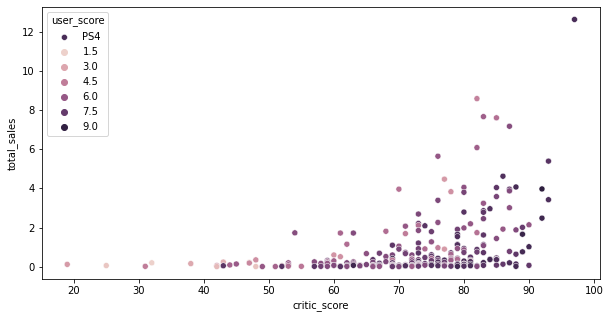

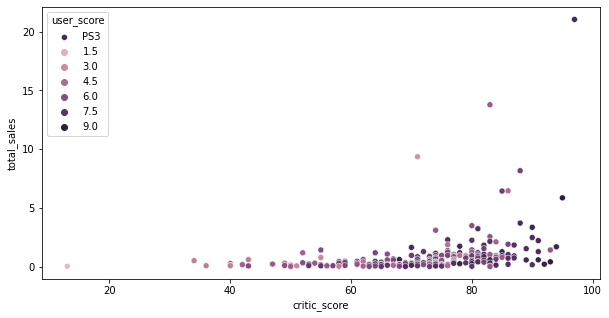

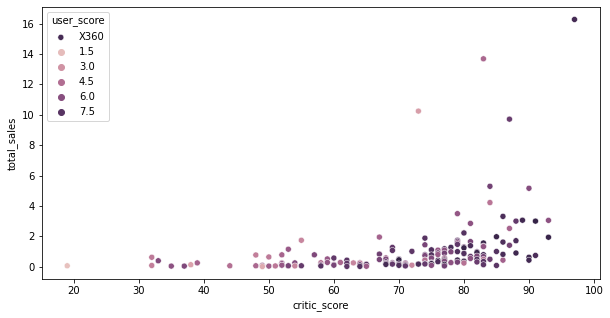

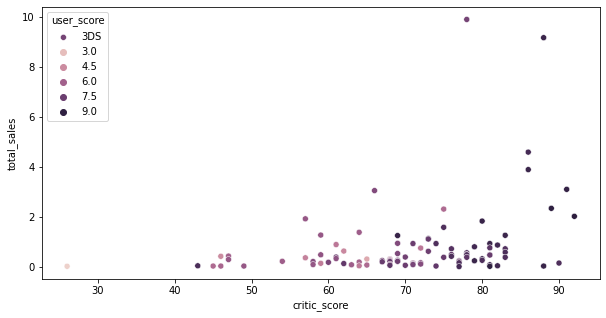

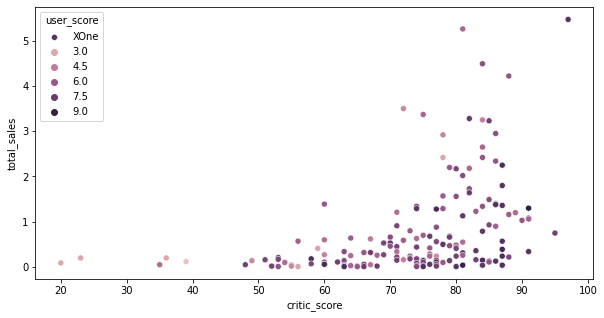

In [122]:
for platform in top_platforms_2:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x='critic_score', y='total_sales', hue='user_score', data=data_actual.query('platform == @platform'), label=platform)
    plt.show()

In [123]:
critic_score_corr = []
user_score_corr = []

for platform in top_platforms_2:
    data_temp = data_actual.query('platform == @platform')
    critic_score_corr.append(data_temp['total_sales'].corr(data_temp['critic_score']))
    user_score_corr.append(data_temp['total_sales'].corr(data_temp['user_score']))


In [124]:
critic_score_corr

[0.4064685741971657,
 0.3310566175801407,
 0.36057348885073365,
 0.31055301915326294,
 0.41215586820316974]

In [125]:
user_score_corr

[-0.031957110204556424,
 -0.005143522887113816,
 0.0061639786462133256,
 0.19758263411038596,
 -0.06892505328279412]

In [126]:
correlations= pd.DataFrame()
correlations['top_platforms_2'] = top_platforms_2
correlations['critic_score_corr'] = critic_score_corr
correlations['user_score_corr'] = user_score_corr
correlations

,top_platforms_2,critic_score_corr,user_score_corr
0,PS4,0.406469,-0.031957
1,PS3,0.331057,-0.005144
2,X360,0.360573,0.006164
3,3DS,0.310553,0.197583
4,XOne,0.412156,-0.068925


**Conclusions:**

We studied the relationship between sales and reviews and came to the following conclusions:
- for all platforms, there is a positive relationship between reviews from critics and the level of sales, for the platforms that we marked as the most promising (PS4 and XOne), the correlation is the strongest (40%+), this can also be seen on the graphs.
- but there is no strong correlation with user reviews, this is true for the most popular platform (PS4), and for all the others.

The difference in impact on sales between critics and user reviews can be explained by timing: user reviews appear after the release of games and their purchase.

### Distribution of games by genres ###

In [127]:
data_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


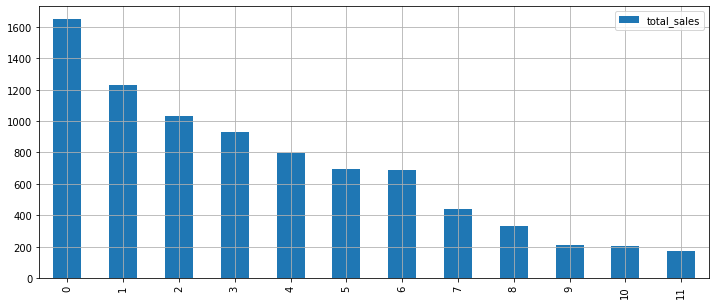

In [128]:
genre_list = (data
    .pivot_table(index='genre', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .reset_index()
)

genre_list.plot(kind='bar', grid=True, figsize=(12, 5))


In [129]:
genre_list

,genre,total_sales
0,Action,1648.51
1,Sports,1227.54
2,Shooter,1033.94
3,Role-Playing,927.63
4,Platform,798.01
5,Misc,692.98
6,Racing,688.81
7,Fighting,437.04
8,Simulation,331.88
9,Puzzle,208.07


**Conclusions:**

The most popular genre is Action, it leads by a wide margin over the rest. The following genres from the list are losing popularity smoothly from one to another, a noticeable jump down occurs in Fighting and Simulation. The three most unpopular genres are Puzzle, Adventure, and, finally, Strategy, they are the least apart from each other.

### Summary: ###

We conducted an exploratory analysis of the data and found the following patterns and features:


1. To predict sales for 2017, we are not interested in considering the data for all the years presented in the dataset: the growth in the number of game sales began to actively gain momentum around 1995, and even then there are various peaks and declines.
2. Looking at the change in sales by platform, we found that the platforms with the highest total sales (more than 600 million copies) are 'PS2', 'X360', 'PS3', 'Wii', 'PS', 'DS' platforms. The average life span of a platform is 7.6 years with a peak in the middle of the cycle, while after a decline in sales, platforms "die" and there are no new sales peaks.
3. Based on the data on platform life cycles, we identified the current period as the last 5 years, and further we will consider data for 2012 and younger.
4. In the current period, 5 platforms are leading in terms of total sales: PS4, PS3, X360, 3DS, XOne. Despite the fact that all of them have already experienced their peak sales and are now declining, two platforms are still significantly more popular than the others, these are PS4 and XOne. Let's mark them as potentially profitable platforms.
5. For all platforms, there is a positive relationship between critic reviews and sales, but the relationship between user reviews and sales is very weak.
6. Finally, after analyzing sales by genre, it turned out that the Action genre is leading by a noticeable margin, and the least popular genre is Strategy.

## User portrait for each region ##

In [130]:
data_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


### Most popular platforms (top 5) ###

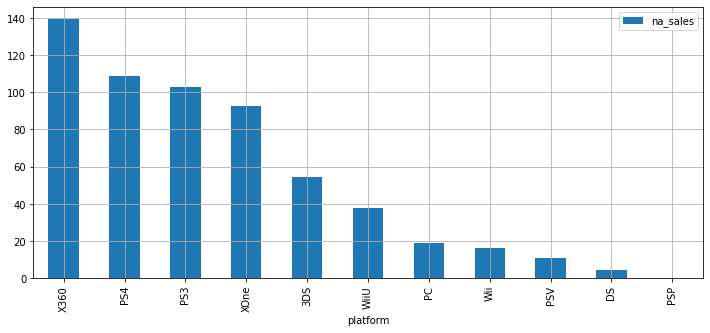

In [131]:
platform_list_na = (data_actual
    .pivot_table(index='platform', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
)

platform_list_na.plot(kind='bar', grid=True, figsize=(12, 5))
plt.show()

In [132]:
platform_list_na

,na_sales
platform,
X360,139.16
PS4,108.62
PS3,103.10
XOne,92.77
3DS,54.65
WiiU,37.90
PC,19.12
Wii,16.06
PSV,10.97


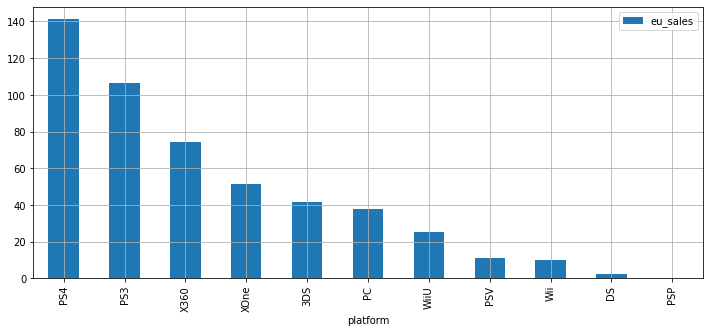

In [133]:
platform_list_eu = (data_actual
    .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
)

platform_list_eu.plot(kind='bar', grid=True, figsize=(12, 5))
plt.show()

In [134]:
platform_list_eu

,eu_sales
platform,
PS4,141.09
PS3,106.26
X360,74.02
XOne,51.43
3DS,41.64
PC,37.67
WiiU,24.97
PSV,11.21
Wii,10.21


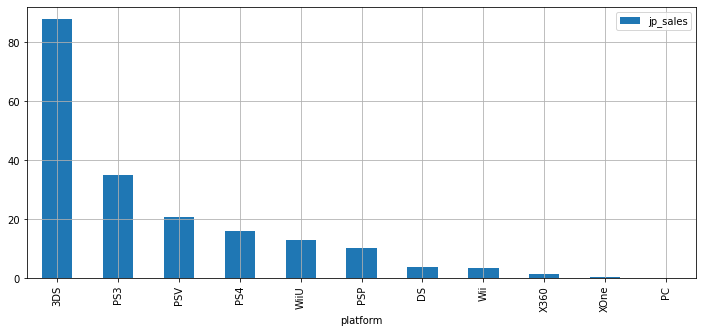

In [135]:
platform_list_jp = (data_actual
    .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
)

platform_list_jp.plot(kind='bar', grid=True, figsize=(12, 5))
plt.show()

In [136]:
platform_list_jp

,jp_sales
platform,
3DS,87.68
PS3,34.92
PSV,20.93
PS4,15.96
WiiU,13.01
PSP,10.29
DS,3.72
Wii,3.33
X360,1.56


### Most popular genres (top 5) ###

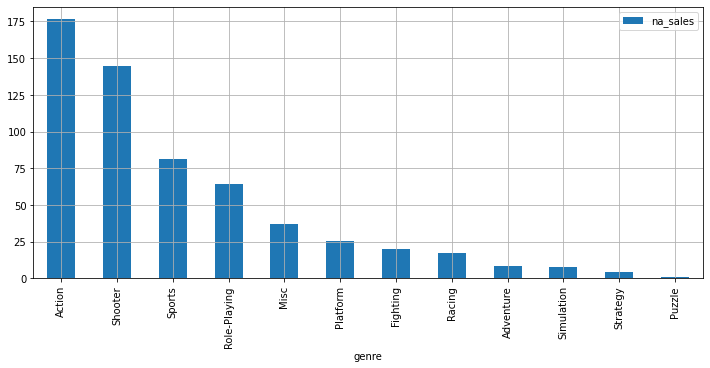

In [137]:
genre_list_na = (data_actual
    .pivot_table(index='genre', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
)

genre_list_na.plot(kind='bar', grid=True, figsize=(12, 5))
plt.show()

In [138]:
genre_list_na

,na_sales
genre,
Action,176.39
Shooter,144.64
Sports,81.13
Role-Playing,64.00
Misc,36.90
Platform,25.15
Fighting,19.73
Racing,17.13
Adventure,8.64


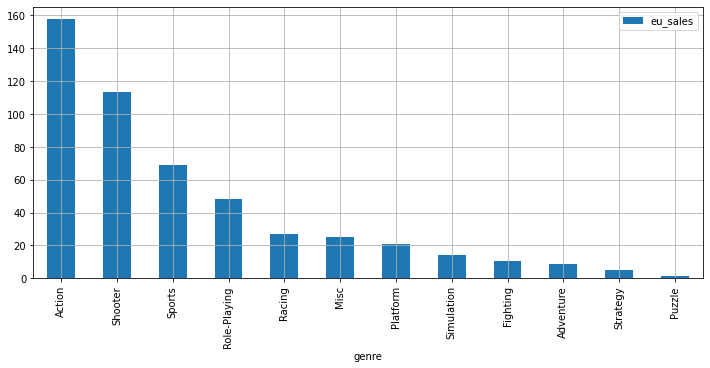

In [139]:
genre_list_eu = (data_actual
    .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
)

genre_list_eu.plot(kind='bar', grid=True, figsize=(12, 5))
plt.show()

In [140]:
genre_list_eu

,eu_sales
genre,
Action,157.51
Shooter,113.33
Sports,68.69
Role-Playing,48.53
Racing,27.19
Misc,24.84
Platform,20.91
Simulation,14.31
Fighting,10.77


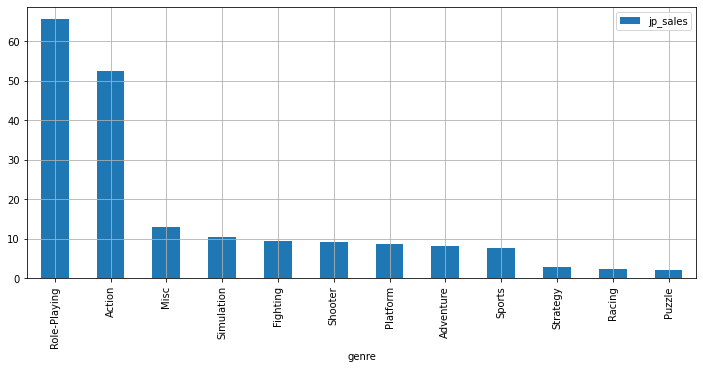

In [141]:
genre_list_jp = (data_actual
    .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
)

genre_list_jp.plot(kind='bar', grid=True, figsize=(12, 5))
plt.show()

In [142]:
genre_list_jp

,jp_sales
genre,
Role-Playing,65.44
Action,52.33
Misc,12.86
Simulation,10.35
Fighting,9.41
Shooter,9.22
Platform,8.63
Adventure,8.24
Sports,7.77


### Does the ESRB rating affect sales in a particular region? ###

In [143]:
data_actual['rating'].isna().sum()

1259

In [144]:
data_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2754 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2754 non-null   object 
 1   platform         2754 non-null   object 
 2   year_of_release  2754 non-null   float64
 3   genre            2754 non-null   object 
 4   na_sales         2754 non-null   float64
 5   eu_sales         2754 non-null   float64
 6   jp_sales         2754 non-null   float64
 7   other_sales      2754 non-null   float64
 8   critic_score     1300 non-null   float64
 9   user_score       1531 non-null   float64
 10  rating           1495 non-null   object 
 11  total_sales      2754 non-null   float64
dtypes: float64(8), object(4)
memory usage: 344.2+ KB


We observe missings in half of the cases, this is too much to conduct further analysis. Let's assign a new category "no_rating" to all observations with missings to see if this group has any specific features.

In [145]:
data_actual['rating'] = data_actual['rating'].fillna('no_rating')
data_actual['rating'].isna().sum()

0

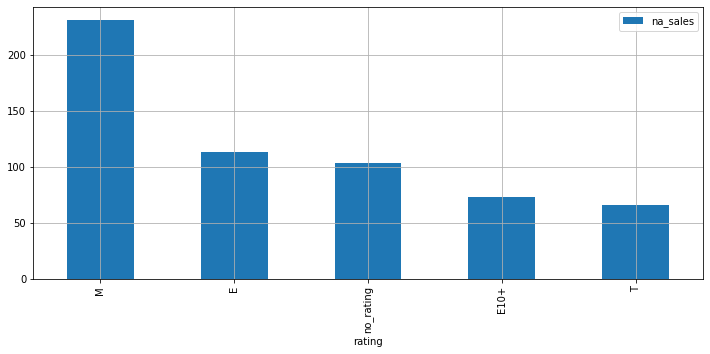

In [146]:
esrb_list_na = (data_actual
    .pivot_table(index='rating', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
)

esrb_list_na.plot(kind='bar', grid=True, figsize=(12, 5))
plt.show()

In [147]:
esrb_list_na

,na_sales
rating,
M,231.47
E,112.92
no_rating,103.27
E10+,73.29
T,65.80


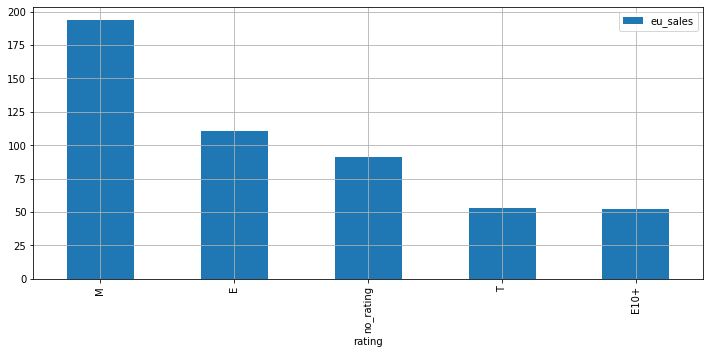

In [148]:
esrb_list_eu = (data_actual
    .pivot_table(index='rating', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
)

esrb_list_eu.plot(kind='bar', grid=True, figsize=(12, 5))
plt.show()

In [149]:
esrb_list_eu

,eu_sales
rating,
M,193.94
E,110.95
no_rating,91.24
T,52.82
E10+,52.48


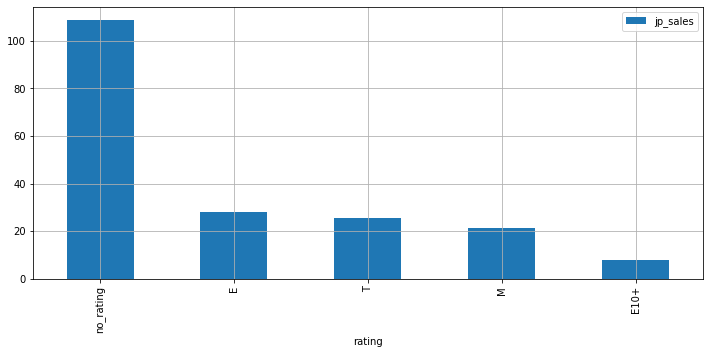

In [150]:
esrb_list_jp = (data_actual
    .pivot_table(index='rating', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
)

esrb_list_jp.plot(kind='bar', grid=True, figsize=(12, 5))
plt.show()

In [151]:
esrb_list_jp

,jp_sales
rating,
no_rating,108.84
E,28.09
T,25.55
M,21.20
E10+,8.06


### Summary: ###

***Most popular platforms and genres by region:***

**North America:**
- platforms, top 5: X360, PS4, PS3, XOne, 3DS
- genres, top 5: Action, Shooter, Sports, Role-Playing, Misc

**Europe:**
- platforms, top 5: PS4, PS3, X360, XOne, 3DS
- genres, top 5: Action, Shooter, Sports, Role-Playing, Racing

**Japan:**
- platforms, top 5: 3DS, PS3, PSV, PS4, WiiU
- genres, top 5: Role-Playing, Action, Misc, Simulation, Fighting

The top 5 platforms in America and Europe have the same set of platforms, while Japan has two other platforms, and the the most popular platform in Japan only ranks fifth in the west. In general, the level of sales in Japan is significantly lower than in other regions.

Differences in genres are also visible: if in Europe and North America the top 5 genres differ only by one genre (Misc in NA and Racing in Europe), then in Japan the picture is completely different. Role-Playing and Action are leading there by a wide margin from other genres.

***Does the ESRB rating affect sales in a particular region?***

Yes, it does. Games with different ESRB ratings have different sales rates. For example, games rated M (mature, 17+) are the most popular in the western regions, their sales are significantly higher than other categories, the third place is taken by games without a rating. But in Japan, games without a rating are much more popular than games with a rating, they have higher sales than all the games with the ratings combined. Among the games with a rating, games for everyone (Everyone) are taking the lead, then games for children from 13 years old, and only then there are games with a rating of 17+.

## Hypotheses testing ##

### Hypothesis 1: The average user ratings of the Xbox One and PC platforms are the same ###

**Null hypothesis:** The average user ratings of the Xbox One and PC platforms do not differ (the difference is not statistically significant)


**Alternative hypothesis:** The average user ratings of the Xbox One and PC platforms are different (the difference is statistically significant)

In [152]:
sample_1 = data_actual.loc[(data_actual['platform'] == 'XOne'), 'user_score']
sample_2 = data_actual.loc[(data_actual['platform'] == 'PC'), 'user_score']

alpha = .05

results = st.ttest_ind(
    sample_1, 
    sample_2)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("reject null hypothesis")
else:
    print("cannot reject null hypothesis")

p-value:  nan
cannot reject null hypothesis


In [153]:
sample_1.isna().mean()

0.2288135593220339

In [154]:
sample_2.isna().mean()

0.15918367346938775

There are missings in the samples, so the p-value cannot be calculated. Let's replace missings with -1 and filter out only positive values to test hypotheses.

In [155]:
data_actual['user_score'] = data_actual['user_score'].fillna(-1)

In [156]:
sample_1 = data_actual.query('user_score >=0').loc[(data_actual['platform'] == 'XOne'), 'user_score']
sample_2 = data_actual.query('user_score >=0').loc[(data_actual['platform'] == 'PC'), 'user_score']

alpha = .05

results = st.ttest_ind(sample_1, sample_2, equal_var = False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("reject null hypothesis")
else:
    print("cannot reject null hypothesis")

p-value:  0.5489537965134912
cannot reject null hypothesis


### Hypothesis 2: Average user ratings for Action and Sports are different ###

**Null hypothesis:** The average user ratings of the Action and Sports genres do not differ (the difference is not statistically significant)


**Alternative hypothesis:** The average user ratings of the Action and Sports genres are different (the difference is statistically significant)

In [157]:
sample_1 = data_actual.query('user_score >=0').loc[(data_actual['genre'] == 'Action'), 'user_score']
sample_2 = data_actual.query('user_score >=0').loc[(data_actual['genre'] == 'Sports'), 'user_score']

alpha = .05

results = st.ttest_ind(sample_1, sample_2, equal_var = False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("reject null hypothesis")
else:
    print("cannot reject null hypothesis")

p-value:  4.24307776572644e-20
reject null hypothesis


### Summary: ###

When comparing the average user ratings of the Xbox One and PC platforms, we have to accept the null hypothesis, since the chance that the values ​​are the same is significantly greater than the given 5% (p-value=0.55). So, indeed, **average user ratings for the Xbox One and PC platforms are the same**.

When comparing the average user ratings of the genres Astion and Sports, we have to reject the null hypothesis, since the chance that the values ​​are the same is significantly less than the given 5% (p-value=4.24307776572644e-20). So, indeed, **average user ratings for the Astion and Sports genres are different**.

To test hypotheses, we chose a method for comparing two populations (we are not considering a sample, but all the data for the current period), and since the samples are not quantitatively equal, we added the equal_var = False parameter. We also chose an alpha criterion of 5%, since such accuracy is usually considered sufficient.

## Overall summary ##

The aim of the work is to find patterns in game sales data in different regions in order to plan marketing campaigns for the next (2017) year.

We examined the data, processed gaps, performed data analysis, and came to the following conclusions:

1. The life of the platform is 7.6 years on average, with a peak in sales in the middle of the life cycle, after which sales decline and the platform disappears. This means that you need to bet on newer platforms, whose peak sales are as close as possible to 2017. We have identified two such platforms: PS4 and XOne. They have already experienced the peak, but their sales level is significantly higher compared to the rest of the platforms. However, local differences should also be taken into account: for example, in Europe and North America, PS4 and XOne entered the top 5 during the period under review, while in Japan, XOne did not enter the top 5.
2. In addition, genres also are different in popularity. Thus, globally the Action genre is the most popular, but in Japan the Role-Playing genre is very popular as well.
3. Critics' ratings have a strong correlation with the sales rates, while the relationship between user ratings and sales is rather little. The PS4 and XOne platforms are the most critically sensitive and have the strongest correlation.
4. You should also take into account the ESRB rating, especially locally: games with an M (mature, 17+) rating are the most popular in the western regions, their sales are significantly higher than other categories, but in Japan, unrated games are the most popular, they account for more than half of all sales.
5. Moreover, after testing the statistical hypotheses, we found that: the average user ratings of the Xbox One and PC platforms are the same, while the average user ratings of the Astion and Sports genres are different.

The characteristics described above, and especially local differences, are important to consider when planning a campaign for 2017.